In [1]:
import pickle
X_train, y_train, X_test, y_test = pickle.load(open("desafio_1_data.pkl", 'rb'))

FileNotFoundError: ignored

In [0]:
X_train.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,DSL,NoInternetService,OneyearContract,TwoyearContract,BanktransferPay,CreditcardPay,MailedcheckPay,tenure_n,MonthlyCharges_n,TotalCharges_n,monthly_sobre_total_n,Cant_productos_n,Cant_productos_internet_n,MonthlyCharges_d2_0,MonthlyCharges_d2_1,MonthlyCharges_d2_2,TotalCharges_d2_0,TotalCharges_d2_1,TotalCharges_d2_2,TotalCharges_d2_3,TotalCharges_d2_4,TotalCharges_d2_5,TotalCharges_d2_6,TotalCharges_d2_7,tenure_d2_0,tenure_d2_1,tenure_d2_2,tenure_d2_3,tenure_d2_4,tenure_d2_5,tenure_d2_6,tenure_d2_7
count,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4.711000e+03,4.711000e+03,4.711000e+03,4.711000e+03,4.711000e+03,4.711000e+03,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000
mean,0.487370,0.161961,0.481851,0.298026,0.901083,0.416472,0.288262,0.348334,0.344725,0.288686,0.386118,0.391849,0.593292,0.344301,0.218425,0.210359,0.242411,0.209934,0.220972,0.226491,-1.484696e-17,2.150100e-16,-3.328784e-17,-3.975687e-17,-7.049716e-16,-1.729554e-16,0.200382,0.399703,0.399915,0.100616,0.099554,0.099979,0.099979,0.199958,0.099979,0.199958,0.099979,0.116960,0.093611,0.104224,0.093611,0.192953,0.205901,0.097856,0.094884
std,0.499894,0.368454,0.499724,0.457439,0.298583,0.493026,0.453002,0.476493,0.475329,0.453200,0.486910,0.488215,0.491272,0.475190,0.413221,0.407607,0.428587,0.407305,0.414946,0.418605,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,0.400329,0.489889,0.489933,0.300851,0.299437,0.300004,0.300004,0.400011,0.300004,0.400011,0.300004,0.321407,0.291317,0.305584,0.291317,0.394658,0.404401,0.297151,0.293086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.274391e+00,-1.541340e+00,-9.964857e-01,-5.144577e-01,-1.466687e+00,-1.112415e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.494104e-01,-9.758785e-01,-8.286698e-01,-4.960046e-01,-1.466687e+00,-1.112415e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.369580e-01,1.874268e-01,-3.909644e-01,-4.345622e-01,6.818088e-01,-2.605782e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.598528e-01,8.367522e-01,6.533569e-01,-1.445206e-01,6.818088e-01,5.171209e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [0]:
from keras import models, layers
from keras import optimizers
import matplotlib.pyplot as plt

In [0]:
model = models.Sequential(name='Modelo de base')
model.add(layers.Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = X_train[:500]
partial_x_train = X_train[500:]

y_val = y_train[:500]
partial_y_train = y_train[500:]

In [0]:
# Ajustar el modelo usando los siguientes parametros:
# - Para entrenar Usamos partial_x_train y partial_y_train
# - Para validar pasamos (x_val, y_val) al argumento validation_data.
# - 20 epochs
# - Batch size de 512 elementos
# 
# Asegurarse de guardar la historia del entrenamiento la cual es retornada por
# el método fit. Ver que la varaible utilizada se llama "history".

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 4211 samples, validate on 500 samples
Epoch 1/20
4211/4211 [==============================] - 0s 9us/step - loss: 0.3837 - accuracy: 0.8231 - val_loss: 0.4188 - val_accuracy: 0.8040
Epoch 2/20
4211/4211 [==============================] - 0s 6us/step - loss: 0.3831 - accuracy: 0.8245 - val_loss: 0.4202 - val_accuracy: 0.8020
Epoch 3/20
4211/4211 [==============================] - 0s 6us/step - loss: 0.3830 - accuracy: 0.8238 - val_loss: 0.4222 - val_accuracy: 0.8040
Epoch 4/20
4211/4211 [==============================] - 0s 5us/step - loss: 0.3828 - accuracy: 0.8236 - val_loss: 0.4232 - val_accuracy: 0.8040
Epoch 5/20
4211/4211 [==============================] - 0s 6us/step - loss: 0.3830 - accuracy: 0.8228 - val_loss: 0.4245 - val_accuracy: 0.8020
Epoch 6/20
4211/4211 [==============================] - 0s 6us/step - loss: 0.3826 - accuracy: 0.8236 - val_loss: 0.4261 - val_accuracy: 0.8000
Epoch 7/20
4211/4211 [==============================] - 0s 5us/step - loss: 0.3826 - accu

In [0]:
model2 = models.Sequential(name='Modelo mas complejo')
model2.add(layers.Dense(32, activation='relu', input_dim=X_train.shape[1]))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = X_train[:500]
partial_x_train = X_train[500:]

y_val = y_train[:500]
partial_y_train = y_train[500:]

In [0]:

history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 4211 samples, validate on 500 samples
Epoch 1/20
4211/4211 [==============================] - 0s 30us/step - loss: 0.6089 - accuracy: 0.7043 - val_loss: 0.5361 - val_accuracy: 0.7540
Epoch 2/20
4211/4211 [==============================] - 0s 6us/step - loss: 0.5115 - accuracy: 0.7592 - val_loss: 0.4857 - val_accuracy: 0.7680
Epoch 3/20
4211/4211 [==============================] - 0s 6us/step - loss: 0.4667 - accuracy: 0.7825 - val_loss: 0.4618 - val_accuracy: 0.7860
Epoch 4/20
4211/4211 [==============================] - 0s 6us/step - loss: 0.4442 - accuracy: 0.7941 - val_loss: 0.4500 - val_accuracy: 0.7860
Epoch 5/20
4211/4211 [==============================] - 0s 7us/step - loss: 0.4337 - accuracy: 0.7996 - val_loss: 0.4466 - val_accuracy: 0.7860
Epoch 6/20
4211/4211 [==============================] - 0s 6us/step - loss: 0.4270 - accuracy: 0.8008 - val_loss: 0.4392 - val_accuracy: 0.7940
Epoch 7/20
4211/4211 [==============================] - 0s 6us/step - loss: 0.4217 - acc

In [0]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model_L1 = Sequential(name='Modelo L1')
model_L1.add(Dense(16, activation='relu', input_shape=(45,),
                   kernel_regularizer=regularizers.l1(0.001)))
model_L1.add(Dense(16, activation='relu',
                   kernel_regularizer=regularizers.l1(0.001)))
model_L1.add(Dense(1, activation='sigmoid'))

model_L1.summary()

Model: "Modelo L1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 16)                736       
_________________________________________________________________
dense_23 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compilamos el modelo
model_L1.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Entrenamos
history_L1 = model_L1.fit(partial_x_train, partial_y_train,
                          epochs=20, batch_size=24,
                          validation_data=(x_val, y_val))

Train on 4211 samples, validate on 500 samples
Epoch 1/20
4211/4211 [==============================] - 0s 74us/step - loss: 0.5002 - accuracy: 0.8057 - val_loss: 0.4953 - val_accuracy: 0.7980
Epoch 2/20
4211/4211 [==============================] - 0s 55us/step - loss: 0.4809 - accuracy: 0.8084 - val_loss: 0.4860 - val_accuracy: 0.8000
Epoch 3/20
4211/4211 [==============================] - 0s 59us/step - loss: 0.4709 - accuracy: 0.8086 - val_loss: 0.4824 - val_accuracy: 0.7980
Epoch 4/20
4211/4211 [==============================] - 0s 58us/step - loss: 0.4645 - accuracy: 0.8110 - val_loss: 0.4843 - val_accuracy: 0.7980
Epoch 5/20
4211/4211 [==============================] - 0s 53us/step - loss: 0.4601 - accuracy: 0.8098 - val_loss: 0.4740 - val_accuracy: 0.7980
Epoch 6/20
4211/4211 [==============================] - 0s 54us/step - loss: 0.4564 - accuracy: 0.8098 - val_loss: 0.4643 - val_accuracy: 0.8140
Epoch 7/20
4211/4211 [==============================] - 0s 50us/step - loss: 0.4530

In [0]:
model_L2 = Sequential(name='Modelo L2')
model_L2.add(Dense(16, activation='relu', input_shape=(45,),
                   kernel_regularizer=regularizers.l2(0.01),))
model_L2.add(Dense(16, activation='relu',
                   kernel_regularizer=regularizers.l2(0.01)))
model_L2.add(Dense(1, activation='sigmoid'))

model_L2.summary()

Model: "Modelo L2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 16)                736       
_________________________________________________________________
dense_26 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compilamos el modelo
model_L2.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Entrenamos
history_L2 = model_L2.fit(partial_x_train, partial_y_train,
                          epochs=20, batch_size=24,
                          validation_data=(x_val, y_val))

Train on 4211 samples, validate on 500 samples
Epoch 1/20
4211/4211 [==============================] - 0s 70us/step - loss: 0.7477 - accuracy: 0.7594 - val_loss: 0.6164 - val_accuracy: 0.7700
Epoch 2/20
4211/4211 [==============================] - 0s 50us/step - loss: 0.5548 - accuracy: 0.8024 - val_loss: 0.5324 - val_accuracy: 0.7920
Epoch 3/20
4211/4211 [==============================] - 0s 51us/step - loss: 0.4988 - accuracy: 0.8079 - val_loss: 0.4977 - val_accuracy: 0.7980
Epoch 4/20
4211/4211 [==============================] - 0s 51us/step - loss: 0.4756 - accuracy: 0.8062 - val_loss: 0.4847 - val_accuracy: 0.8000
Epoch 5/20
4211/4211 [==============================] - 0s 52us/step - loss: 0.4622 - accuracy: 0.8081 - val_loss: 0.4696 - val_accuracy: 0.8020
Epoch 6/20
4211/4211 [==============================] - 0s 51us/step - loss: 0.4537 - accuracy: 0.8048 - val_loss: 0.4628 - val_accuracy: 0.8000
Epoch 7/20
4211/4211 [==============================] - 0s 52us/step - loss: 0.4468

In [0]:
from keras.layers import Dropout

model_dropout = Sequential(name='Modelo de base con Dropout')
model_dropout.add(Dense(16, activation='relu', input_shape=(45,)))
# Aleatoriamente, "apagamos" la mitad de las neuronas de la capa en cada iteración del feedforward
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(16, activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(1, activation='sigmoid'))

model_dropout.summary()

Model: "Modelo de base con Dropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 16)                736       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compilamos el modelo
model_dropout.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Entrenamos
history_dropout = model_dropout.fit(partial_x_train, partial_y_train,
                                    epochs=20, batch_size=24,
                                    validation_data=(x_val, y_val))

Train on 4211 samples, validate on 500 samples
Epoch 1/20
4211/4211 [==============================] - 0s 89us/step - loss: 0.4886 - accuracy: 0.7523 - val_loss: 0.4383 - val_accuracy: 0.7740
Epoch 2/20
4211/4211 [==============================] - 0s 56us/step - loss: 0.4763 - accuracy: 0.7699 - val_loss: 0.4338 - val_accuracy: 0.7780
Epoch 3/20
4211/4211 [==============================] - 0s 60us/step - loss: 0.4694 - accuracy: 0.7661 - val_loss: 0.4346 - val_accuracy: 0.7820
Epoch 4/20
4211/4211 [==============================] - 0s 58us/step - loss: 0.4697 - accuracy: 0.7768 - val_loss: 0.4311 - val_accuracy: 0.7840
Epoch 5/20
4211/4211 [==============================] - 0s 54us/step - loss: 0.4605 - accuracy: 0.7749 - val_loss: 0.4285 - val_accuracy: 0.7820
Epoch 6/20
4211/4211 [==============================] - 0s 55us/step - loss: 0.4602 - accuracy: 0.7784 - val_loss: 0.4276 - val_accuracy: 0.7900
Epoch 7/20
4211/4211 [==============================] - 0s 58us/step - loss: 0.4492

In [0]:
# Importamos la clase EarlyStopping
from keras.callbacks import EarlyStopping

# Instanciamos nuestro objeto early_stopping y definimos una lista de callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, restore_best_weights=True, verbose=1)
callbacks_list = [early_stopping]

In [0]:
model = Sequential(name='Modelo de base')
model.add(Dense(16, activation='relu', input_shape=(45,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamos
history_stop = model.fit(partial_x_train, partial_y_train,
                         epochs=20, batch_size=24,
                         callbacks=callbacks_list,
                         validation_data=(x_val, y_val))

Train on 4211 samples, validate on 500 samples
Epoch 1/20
4211/4211 [==============================] - 0s 75us/step - loss: 0.4211 - accuracy: 0.8010 - val_loss: 0.4293 - val_accuracy: 0.8000
Epoch 2/20
4211/4211 [==============================] - 0s 61us/step - loss: 0.4128 - accuracy: 0.8048 - val_loss: 0.4210 - val_accuracy: 0.8020
Epoch 3/20
4211/4211 [==============================] - 0s 56us/step - loss: 0.4088 - accuracy: 0.8100 - val_loss: 0.4213 - val_accuracy: 0.8000
Epoch 4/20
4211/4211 [==============================] - 0s 56us/step - loss: 0.4052 - accuracy: 0.8093 - val_loss: 0.4281 - val_accuracy: 0.7900
Epoch 5/20
4211/4211 [==============================] - 0s 61us/step - loss: 0.4032 - accuracy: 0.8093 - val_loss: 0.4214 - val_accuracy: 0.7960
Restoring model weights from the end of the best epoch
Epoch 00005: early stopping


In [0]:
model = Sequential(name='Modelo OPTIMIZADOR SGD')
model.add(Dense(16, activation='relu', input_shape=(45,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# Instanciamos el clasificador con los hiperparámetros
optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False)
# Compilamos el modelo pasando la instancia
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
# Guardamos el estado inicial para reutilizarlo más adelante
model.save_weights('initial_weights.h5')

In [0]:
def plot_history(name, history, legend, plot_val=True):
    fig, ax = plt.subplots(1,2,figsize=(14,6))
    fig.suptitle(name)
    
    if not isinstance(history, list):
        history = [history]
        
    for h in history:
        acc = h.history['acc']
        loss = h.history['loss']
        if plot_val:
            val_loss = h.history['val_loss']
            val_acc = h.history['val_acc']
        epochs = range(1, len(acc) + 1)

        ax[0].set_title('Loss')
        ax[0].set_xticks(ticks=epochs)
        ax[0].set_ylabel('Loss')
        
        ax[0].plot(epochs, loss)
        if plot_val:
            ax[0].plot(epochs, val_loss)
            
        ax[1].set_title('Accuracy')
        ax[1].set_xticks(ticks=list(epochs))
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Accuracy')
        ax[1].plot(epochs, acc)
        if plot_val:
            ax[1].plot(epochs, val_acc)
        
    ax[0].legend([l+' loss' for l in legend])
    ax[1].legend([l+' accuracy' for l in legend])

Entrenando con batch_size =  1
Train on 4239 samples, validate on 472 samples
Epoch 1/20
4239/4239 [==============================] - 5s 1ms/step - loss: 0.5271 - acc: 0.7398 - val_loss: 0.4456 - val_acc: 0.7987
Epoch 2/20
4239/4239 [==============================] - 5s 1ms/step - loss: 0.4459 - acc: 0.7851 - val_loss: 0.3994 - val_acc: 0.8178
Epoch 3/20
4239/4239 [==============================] - 5s 1ms/step - loss: 0.4278 - acc: 0.7962 - val_loss: 0.3865 - val_acc: 0.8114
Epoch 4/20
4239/4239 [==============================] - 5s 1ms/step - loss: 0.4220 - acc: 0.7988 - val_loss: 0.3828 - val_acc: 0.8093
Epoch 5/20
4239/4239 [==============================] - 5s 1ms/step - loss: 0.4177 - acc: 0.8040 - val_loss: 0.3788 - val_acc: 0.8093
Epoch 6/20
4239/4239 [==============================] - 5s 1ms/step - loss: 0.4151 - acc: 0.8051 - val_loss: 0.3773 - val_acc: 0.8157
Epoch 7/20
4239/4239 [==============================] - 5s 1ms/step - loss: 0.4124 - acc: 0.8059 - val_loss: 0.3760 - 

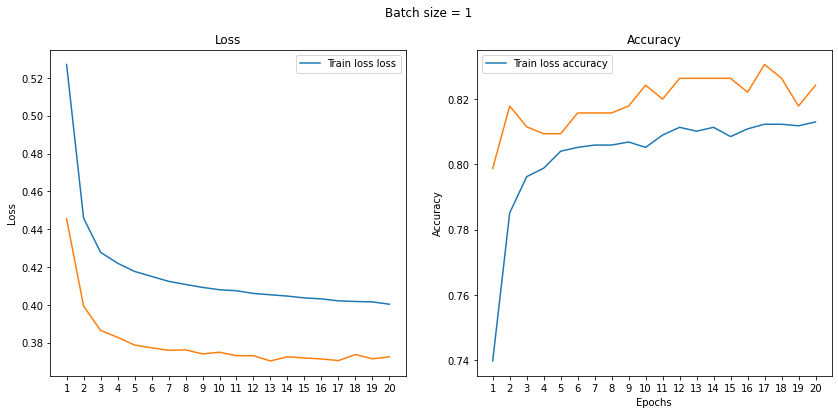

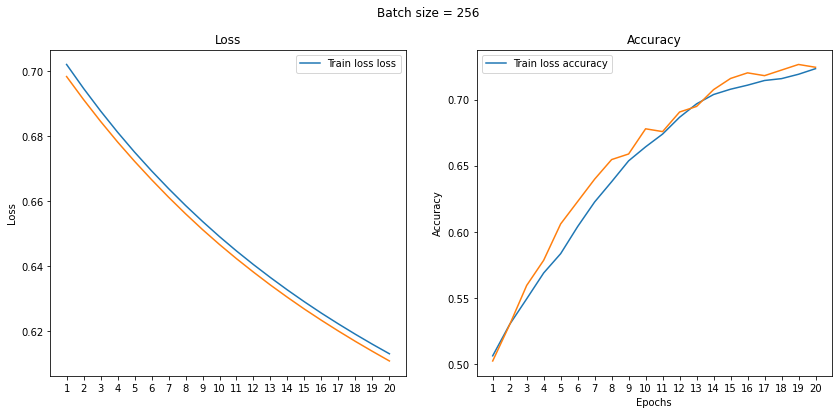

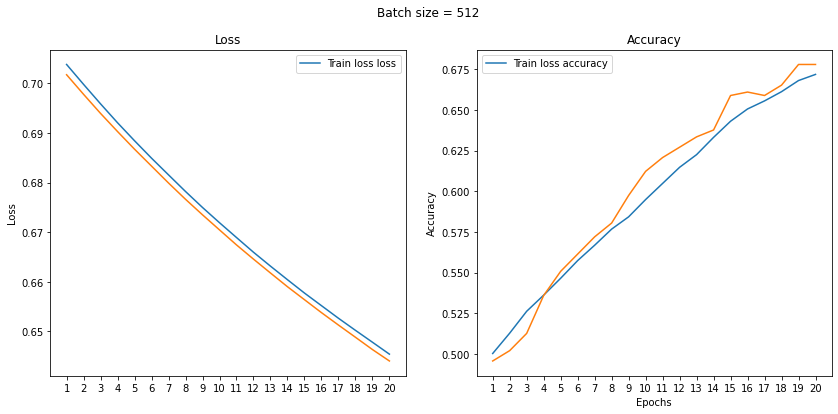

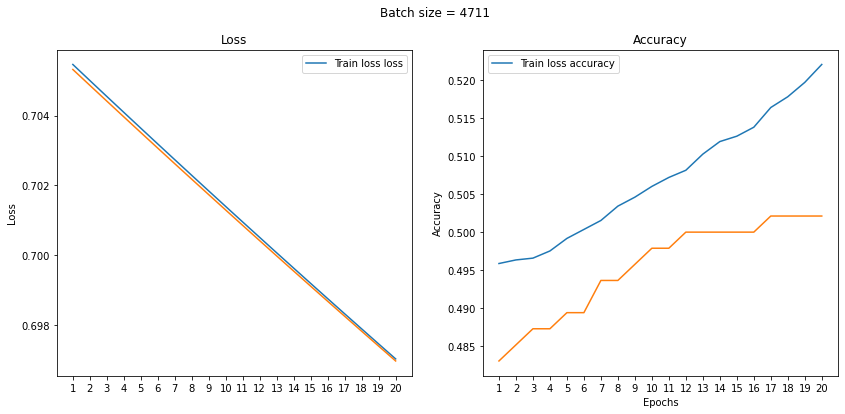

In [0]:
import time
%matplotlib inline
sizes = [1,256, 512, X_train.shape[0]]
for batch_size in sizes:
    # Reiniciamos los pesos del modelo
    model.load_weights('initial_weights.h5')
    print('Entrenando con batch_size = ', batch_size)
    tic=time.time()
    history=model.fit(X_train, y_train, 
                      batch_size=batch_size, 
                      epochs=20, 
                      validation_split=0.1,
                      verbose=1)
    toc=time.time()
    plot_history(f'Batch size = {batch_size}', history, legend=['Train loss'])
    print('Tiempo de entrenamiento:', round(toc-tic, 2), 'segundos')

In [0]:
# Instanciamos el clasificador con los hiperparámetros
optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
# Compilamos el modelo pasando la instancia
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

Train on 4239 samples, validate on 472 samples
Epoch 1/20
4239/4239 [==============================] - 0s 71us/step - loss: 0.5785 - acc: 0.7127 - val_loss: 0.5162 - val_acc: 0.7331
Epoch 2/20
4239/4239 [==============================] - 0s 47us/step - loss: 0.5034 - acc: 0.7464 - val_loss: 0.4651 - val_acc: 0.7797
Epoch 3/20
4239/4239 [==============================] - 0s 56us/step - loss: 0.4678 - acc: 0.7712 - val_loss: 0.4283 - val_acc: 0.8051
Epoch 4/20
4239/4239 [==============================] - 0s 56us/step - loss: 0.4454 - acc: 0.7870 - val_loss: 0.4077 - val_acc: 0.8114
Epoch 5/20
4239/4239 [==============================] - 0s 49us/step - loss: 0.4344 - acc: 0.7931 - val_loss: 0.3971 - val_acc: 0.8178
Epoch 6/20
4239/4239 [==============================] - 0s 48us/step - loss: 0.4287 - acc: 0.7969 - val_loss: 0.3908 - val_acc: 0.8199
Epoch 7/20
4239/4239 [==============================] - 0s 51us/step - loss: 0.4247 - acc: 0.7976 - val_loss: 0.3872 - val_acc: 0.8178
Epoch 8/

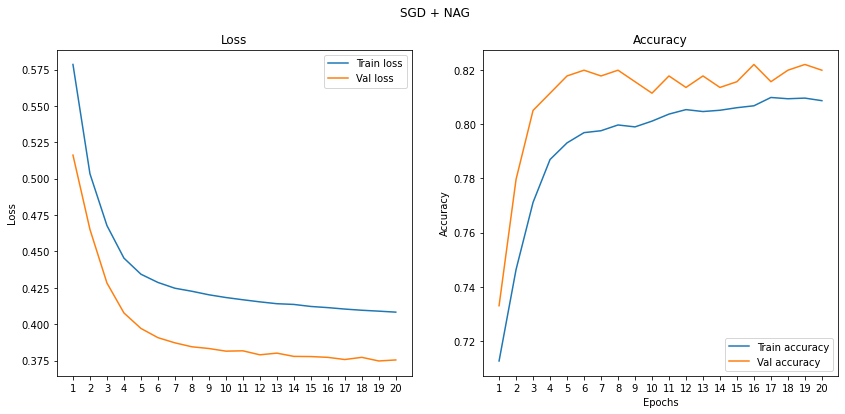

In [0]:
model.load_weights('initial_weights.h5')
nag_history=model.fit(X_train, y_train, 
                      batch_size=24, 
                      epochs=20, 
                      validation_split=0.1,
                      verbose=1)
plot_history('SGD + NAG', nag_history, legend=['Train', 'Val'])

In [0]:
# Instanciamos el clasificador con los hiperparámetros
optimizer = optimizers.RMSprop()
# Compilamos el modelo pasando la instancia
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

Train on 4239 samples, validate on 472 samples
Epoch 1/20
4239/4239 [==============================] - 0s 29us/step - loss: 0.6118 - acc: 0.6995 - val_loss: 0.5480 - val_acc: 0.7627
Epoch 2/20
4239/4239 [==============================] - 0s 7us/step - loss: 0.5236 - acc: 0.7563 - val_loss: 0.4804 - val_acc: 0.7775
Epoch 3/20
4239/4239 [==============================] - 0s 7us/step - loss: 0.4761 - acc: 0.7690 - val_loss: 0.4354 - val_acc: 0.8093
Epoch 4/20
4239/4239 [==============================] - 0s 7us/step - loss: 0.4476 - acc: 0.7879 - val_loss: 0.4082 - val_acc: 0.8093
Epoch 5/20
4239/4239 [==============================] - 0s 6us/step - loss: 0.4318 - acc: 0.7974 - val_loss: 0.3945 - val_acc: 0.8220
Epoch 6/20
4239/4239 [==============================] - 0s 6us/step - loss: 0.4244 - acc: 0.8000 - val_loss: 0.3848 - val_acc: 0.8178
Epoch 7/20
4239/4239 [==============================] - 0s 7us/step - loss: 0.4203 - acc: 0.7985 - val_loss: 0.3827 - val_acc: 0.8199
Epoch 8/20
423

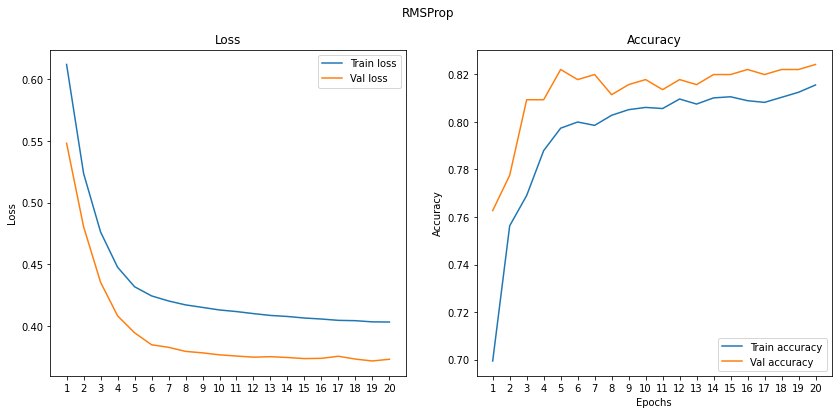

In [0]:
model.load_weights('initial_weights.h5')
rmsprop_history=model.fit(X_train, y_train, 
                      batch_size=256, 
                      epochs=20, 
                      validation_split=0.1,
                      verbose=1)
plot_history('RMSProp', rmsprop_history, legend=['Train', 'Val'])

In [0]:
# Instanciamos el clasificador con los hiperparámetros
optimizer = optimizers.Adam()
# Compilamos el modelo pasando la instancia
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

Train on 4239 samples, validate on 472 samples
Epoch 1/20
4239/4239 [==============================] - 0s 86us/step - loss: 0.4898 - acc: 0.7594 - val_loss: 0.3882 - val_acc: 0.8072
Epoch 2/20
4239/4239 [==============================] - 0s 54us/step - loss: 0.4215 - acc: 0.8030 - val_loss: 0.3768 - val_acc: 0.8157
Epoch 3/20
4239/4239 [==============================] - 0s 54us/step - loss: 0.4135 - acc: 0.8077 - val_loss: 0.3764 - val_acc: 0.8178
Epoch 4/20
4239/4239 [==============================] - 0s 55us/step - loss: 0.4100 - acc: 0.8082 - val_loss: 0.3722 - val_acc: 0.8220
Epoch 5/20
4239/4239 [==============================] - 0s 51us/step - loss: 0.4068 - acc: 0.8084 - val_loss: 0.3754 - val_acc: 0.8178
Epoch 6/20
4239/4239 [==============================] - 0s 51us/step - loss: 0.4058 - acc: 0.8094 - val_loss: 0.3724 - val_acc: 0.8157
Epoch 7/20
4239/4239 [==============================] - 0s 54us/step - loss: 0.4024 - acc: 0.8127 - val_loss: 0.3694 - val_acc: 0.8263
Epoch 8/

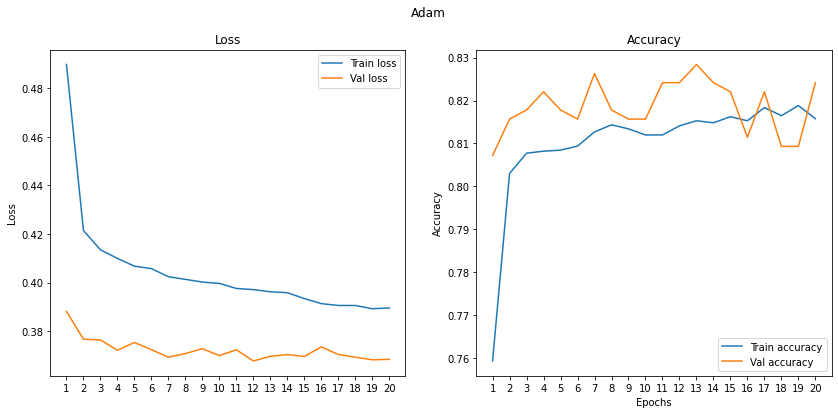

In [0]:
model.load_weights('initial_weights.h5')
adam_history=model.fit(X_train, y_train, 
                      batch_size=24, 
                      epochs=20, 
                      validation_split=0.1,
                      verbose=1)
plot_history('Adam', adam_history, legend=['Train', 'Val'])

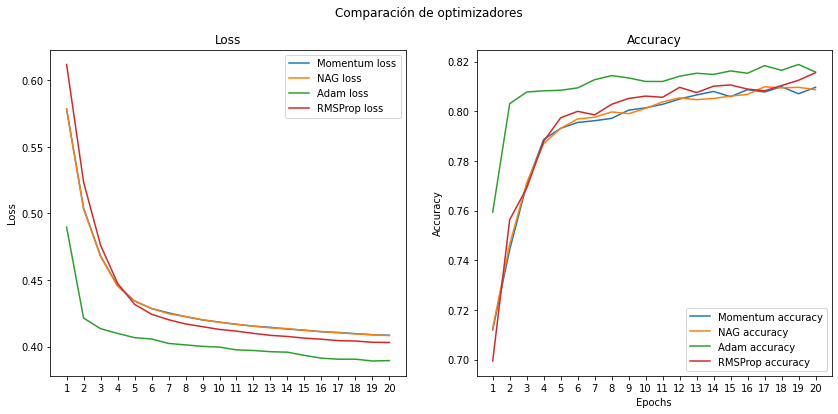

In [0]:
plot_history('Comparación de optimizadores', 
             [momentum_history, nag_history, adam_history, rmsprop_history], 
             plot_val=False, 
             legend=['Momentum', 'NAG', 'Adam', 'RMSProp'])

In [0]:
from keras.layers import BatchNormalization, Activation

In [0]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(45,)))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 256)               11776     
_________________________________________________________________
dense_55 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
activation_6 (Activation)    (None, 256)              

Train on 3156 samples, validate on 1555 samples
Epoch 1/30
3156/3156 [==============================] - 1s 189us/step - loss: 0.0752 - acc: 0.9708 - val_loss: 0.8542 - val_acc: 0.7653
Epoch 2/30
3156/3156 [==============================] - 0s 68us/step - loss: 0.0728 - acc: 0.9728 - val_loss: 0.8736 - val_acc: 0.7576
Epoch 3/30
3156/3156 [==============================] - 0s 68us/step - loss: 0.0766 - acc: 0.9728 - val_loss: 0.8747 - val_acc: 0.7736
Epoch 4/30
3156/3156 [==============================] - 0s 68us/step - loss: 0.0769 - acc: 0.9689 - val_loss: 0.9166 - val_acc: 0.7621
Epoch 5/30
3156/3156 [==============================] - 0s 65us/step - loss: 0.0679 - acc: 0.9715 - val_loss: 0.8849 - val_acc: 0.7563
Epoch 6/30
3156/3156 [==============================] - 0s 64us/step - loss: 0.0644 - acc: 0.9747 - val_loss: 0.8911 - val_acc: 0.7588
Epoch 7/30
3156/3156 [==============================] - 0s 66us/step - loss: 0.0718 - acc: 0.9743 - val_loss: 0.9187 - val_acc: 0.7569
Epoch 

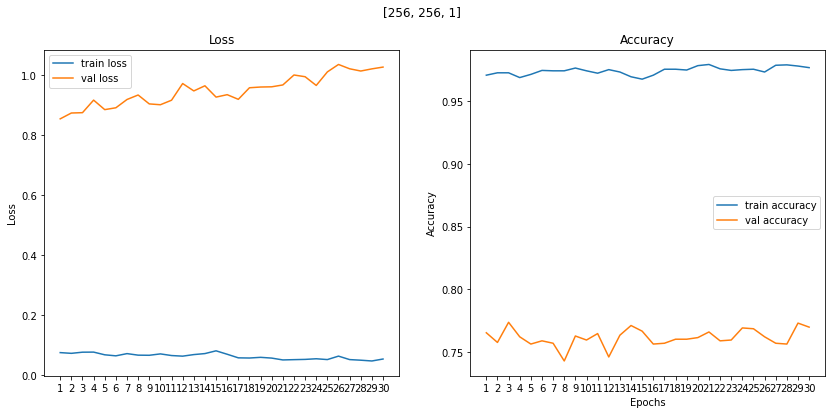

In [0]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.02, momentum=0.9, nesterov=True), loss='binary_crossentropy', metrics=['acc'])
bn_history=model.fit(X_train, y_train, 
                      batch_size=120, 
                      epochs=30, 
                      validation_split=0.33,
                      verbose=1)
plot_history('[256, 256, 1]', bn_history, ['train', 'val'])